In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv("Energy_consumption.csv")

In [3]:
df.sample(10)

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
309  2022-01-13 21:00:00    24.047824  54.587234    1758.418359          8   
310  2022-01-13 22:00:00    28.837302  38.597514    1729.450990          5   
456  2022-01-20 00:00:00    25.383316  54.197724    1994.853234          1   
708  2022-01-30 12:00:00    22.659619  45.551975    1173.140649          6   
882  2022-02-06 18:00:00    24.411232  38.300529    1657.394673          1   
0    2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
101  2022-01-05 05:00:00    23.927237  53.675759    1193.201025          9   
455  2022-01-19 23:00:00    24.250220  53.403189    1221.618630          1   
712  2022-01-30 16:00:00    27.625083  34.419156    1903.193880          6   
72   2022-01-04 00:00:00    25.080881  59.671534    1897.702224          8   

    HVACUsage LightingUsage  RenewableEnergy DayOfWeek Holiday  \
309        On           Off        14.162247    Monday      No   
310        On            On         6.658911    Monday     Yes   
456       Off            On        17.175718  Saturday      No   
708        On           Off        10.930542    Friday      No   
882        On            On        28.864792  Thursday      No   
0          On           Off         2.774699    Monday      No   
101        On            On         6.517224  Thursday      No   
455        On            On         3.648978    Sunday     Yes   
712       Off            On        21.230065    Friday     Yes   
72        Off           Off        14.391800    Friday      No   

     EnergyConsumption  
309          83.219395  
310          96.244796  
456          68.560863  
708          77.847338  
882          75.876891  
0            75.364373  
101          85.181974  
455          77.220285  
712          85.140005  
72           75.913906

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [5]:
df.describe()

Temperature     Humidity  SquareFootage    Occupancy  RenewableEnergy  \
count  1000.000000  1000.000000    1000.000000  1000.000000      1000.000000   
mean     24.982026    45.395412    1500.052488     4.581000        15.132813   
std       2.836850     8.518905     288.418873     2.865598         8.745917   
min      20.007565    30.015975    1000.512661     0.000000         0.006642   
25%      22.645070    38.297722    1247.108548     2.000000         7.628385   
50%      24.751637    45.972116    1507.967426     5.000000        15.072296   
75%      27.418174    52.420066    1740.340165     7.000000        22.884064   
max      29.998671    59.969085    1999.982252     9.000000        29.965327   

       EnergyConsumption  
count        1000.000000  
mean           77.055873  
std             8.144112  
min            53.263278  
25%            71.544690  
50%            76.943696  
75%            82.921742  
max            99.201120

In [6]:
df.isna().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dtypes

Timestamp             object
Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
DayOfWeek             object
Holiday               object
EnergyConsumption    float64
dtype: object

In [9]:
df['Occupancy'].value_counts()

Occupancy
8    118
6    107
3    106
7    101
0     98
5     96
2     96
1     93
9     93
4     92
Name: count, dtype: int64

In [10]:
df['HVACUsage'].value_counts()

HVACUsage
Off    508
On     492
Name: count, dtype: int64

In [11]:
df['LightingUsage'].value_counts(normalize=True) *100

LightingUsage
Off    50.9
On     49.1
Name: proportion, dtype: float64

In [12]:
df.sort_values(by="EnergyConsumption",ascending=False).head()

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
391  2022-01-17 07:00:00    29.764203  40.901013    1463.830143          6   
676  2022-01-29 04:00:00    29.643732  43.958636    1442.274914          8   
670  2022-01-28 22:00:00    28.809744  31.208606    1630.527960          6   
505  2022-01-22 01:00:00    27.909831  36.871317    1263.044600          7   
872  2022-02-06 08:00:00    29.958814  55.970185    1418.618421          1   

    HVACUsage LightingUsage  RenewableEnergy  DayOfWeek Holiday  \
391        On            On        15.321499   Saturday      No   
676       Off            On        27.178950   Saturday      No   
670        On            On        19.352490   Thursday      No   
505       Off           Off        23.410277   Saturday      No   
872        On            On         3.530510  Wednesday     Yes   

     EnergyConsumption  
391          99.201120  
676          98.843756  
670          98.761754  
505          97.773488  
872          96.827015

In [13]:
df.sort_values(by=["EnergyConsumption","RenewableEnergy"],ascending=False).head()

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
391  2022-01-17 07:00:00    29.764203  40.901013    1463.830143          6   
676  2022-01-29 04:00:00    29.643732  43.958636    1442.274914          8   
670  2022-01-28 22:00:00    28.809744  31.208606    1630.527960          6   
505  2022-01-22 01:00:00    27.909831  36.871317    1263.044600          7   
872  2022-02-06 08:00:00    29.958814  55.970185    1418.618421          1   

    HVACUsage LightingUsage  RenewableEnergy  DayOfWeek Holiday  \
391        On            On        15.321499   Saturday      No   
676       Off            On        27.178950   Saturday      No   
670        On            On        19.352490   Thursday      No   
505       Off           Off        23.410277   Saturday      No   
872        On            On         3.530510  Wednesday     Yes   

     EnergyConsumption  
391          99.201120  
676          98.843756  
670          98.761754  
505          97.773488  
872          96.827015

In [14]:
df.select_dtypes(include=np.number)[df['Holiday']=='Yes'].mean()

Temperature            25.063490
Humidity               45.088563
SquareFootage        1491.444360
Occupancy               4.672377
RenewableEnergy        14.797626
EnergyConsumption      77.548741
dtype: float64

In [15]:
df.select_dtypes(include=np.number)[df['LightingUsage']=='On'].mean()

Temperature            25.009295
Humidity               45.202894
SquareFootage        1495.087705
Occupancy               4.545825
RenewableEnergy        14.872079
EnergyConsumption      77.830157
dtype: float64

In [16]:
df.select_dtypes(include= np.number)[(df['Occupancy']<6) & (df['Holiday']=='Yes')].mean()

Temperature            25.205831
Humidity               45.089042
SquareFootage        1485.873815
Occupancy               2.599265
RenewableEnergy        14.603497
EnergyConsumption      76.796580
dtype: float64

In [17]:
df.select_dtypes(include=np.number)[(df['Occupancy']<6) & (df['LightingUsage']=='On')].mean()

Temperature            25.003925
Humidity               45.335791
SquareFootage        1510.950644
Occupancy               2.548276
RenewableEnergy        15.106328
EnergyConsumption      76.790988
dtype: float64

In [18]:
df.apply(np.max)

Timestamp            2022-02-11 15:00:00
Temperature                    29.998671
Humidity                       59.969085
SquareFootage                1999.982252
Occupancy                              9
HVACUsage                             On
LightingUsage                         On
RenewableEnergy                29.965327
DayOfWeek                      Wednesday
Holiday                              Yes
EnergyConsumption               99.20112
dtype: object

In [19]:
df.groupby('EnergyConsumption')[['Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy']].describe(percentiles=[])


Temperature                                                  \
                        count       mean std        min        50%        max   
EnergyConsumption                                                               
53.263278                 1.0  20.735716 NaN  20.735716  20.735716  20.735716   
56.038163                 1.0  20.265191 NaN  20.265191  20.265191  20.265191   
56.158206                 1.0  21.118693 NaN  21.118693  21.118693  21.118693   
56.519850                 1.0  20.080469 NaN  20.080469  20.080469  20.080469   
56.849829                 1.0  20.225128 NaN  20.225128  20.225128  20.225128   
...                       ...        ...  ..        ...        ...        ...   
96.827015                 1.0  29.958814 NaN  29.958814  29.958814  29.958814   
97.773488                 1.0  27.909831 NaN  27.909831  27.909831  27.909831   
98.761754                 1.0  28.809744 NaN  28.809744  28.809744  28.809744   
98.843756                 1.0  29.643732 NaN  29.643732  29.643732  29.643732   
99.201120                 1.0  29.764203 NaN  29.764203  29.764203  29.764203   

                  Humidity                            ... SquareFootage  \
                     count       mean std        min  ...           std   
EnergyConsumption                                     ...                 
53.263278              1.0  48.506636 NaN  48.506636  ...           NaN   
56.038163              1.0  56.569061 NaN  56.569061  ...           NaN   
56.158206              1.0  47.805951 NaN  47.805951  ...           NaN   
56.519850              1.0  50.371637 NaN  50.371637  ...           NaN   
56.849829              1.0  58.498654 NaN  58.498654  ...           NaN   
...                    ...        ...  ..        ...  ...           ...   
96.827015              1.0  55.970185 NaN  55.970185  ...           NaN   
97.773488              1.0  36.871317 NaN  36.871317  ...           NaN   
98.761754              1.0  31.208606 NaN  31.208606  ...           NaN   
98.843756              1.0  43.958636 NaN  43.958636  ...           NaN   
99.201120              1.0  40.901013 NaN  40.901013  ...           NaN   

                                                         RenewableEnergy  \
                           min          50%          max           count   
EnergyConsumption                                                          
53.263278          1836.542651  1836.542651  1836.542651             1.0   
56.038163          1889.115081  1889.115081  1889.115081             1.0   
56.158206          1883.415024  1883.415024  1883.415024             1.0   
56.519850          1452.316318  1452.316318  1452.316318             1.0   
56.849829          1590.286479  1590.286479  1590.286479             1.0   
...                        ...          ...          ...             ...   
96.827015          1418.618421  1418.618421  1418.618421             1.0   
97.773488          1263.044600  1263.044600  1263.044600             1.0   
98.761754          1630.527960  1630.527960  1630.527960             1.0   
98.843756          1442.274914  1442.274914  1442.274914             1.0   
99.201120          1463.830143  1463.830143  1463.830143             1.0   

                                                                   
                        mean std        min        50%        max  
EnergyConsumption                                                  
53.263278           9.295439 NaN   9.295439   9.295439   9.295439  
56.038163          15.641383 NaN  15.641383  15.641383  15.641383  
56.158206           0.055763 NaN   0.055763   0.055763   0.055763  
56.519850           8.623447 NaN   8.623447   8.623447   8.623447  
56.849829          22.932032 NaN  22.932032  22.932032  22.932032  
...                      ...  ..        ...        ...        ...  
96.827015           3.530510 NaN   3.530510   3.530510   3.530510  
97.773488          23.410277 NaN  23.410277  23.410277  23.410277  
98.761754          

<Axes: xlabel='Occupancy', ylabel='count'>

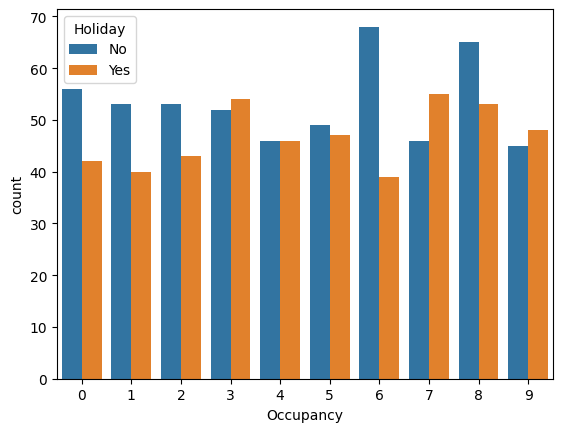

In [20]:
sns.countplot(x='Occupancy',hue='Holiday',data=df)

<Axes: xlabel='LightingUsage'>

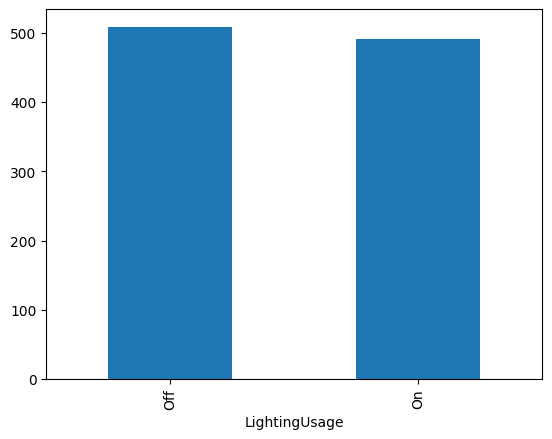

In [21]:
df['LightingUsage'].value_counts().plot(kind='bar')

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'SquareFootage'}>,
        <Axes: title={'center': 'RenewableEnergy'}>],
       [<Axes: title={'center': 'EnergyConsumption'}>, <Axes: >]],
      dtype=object)

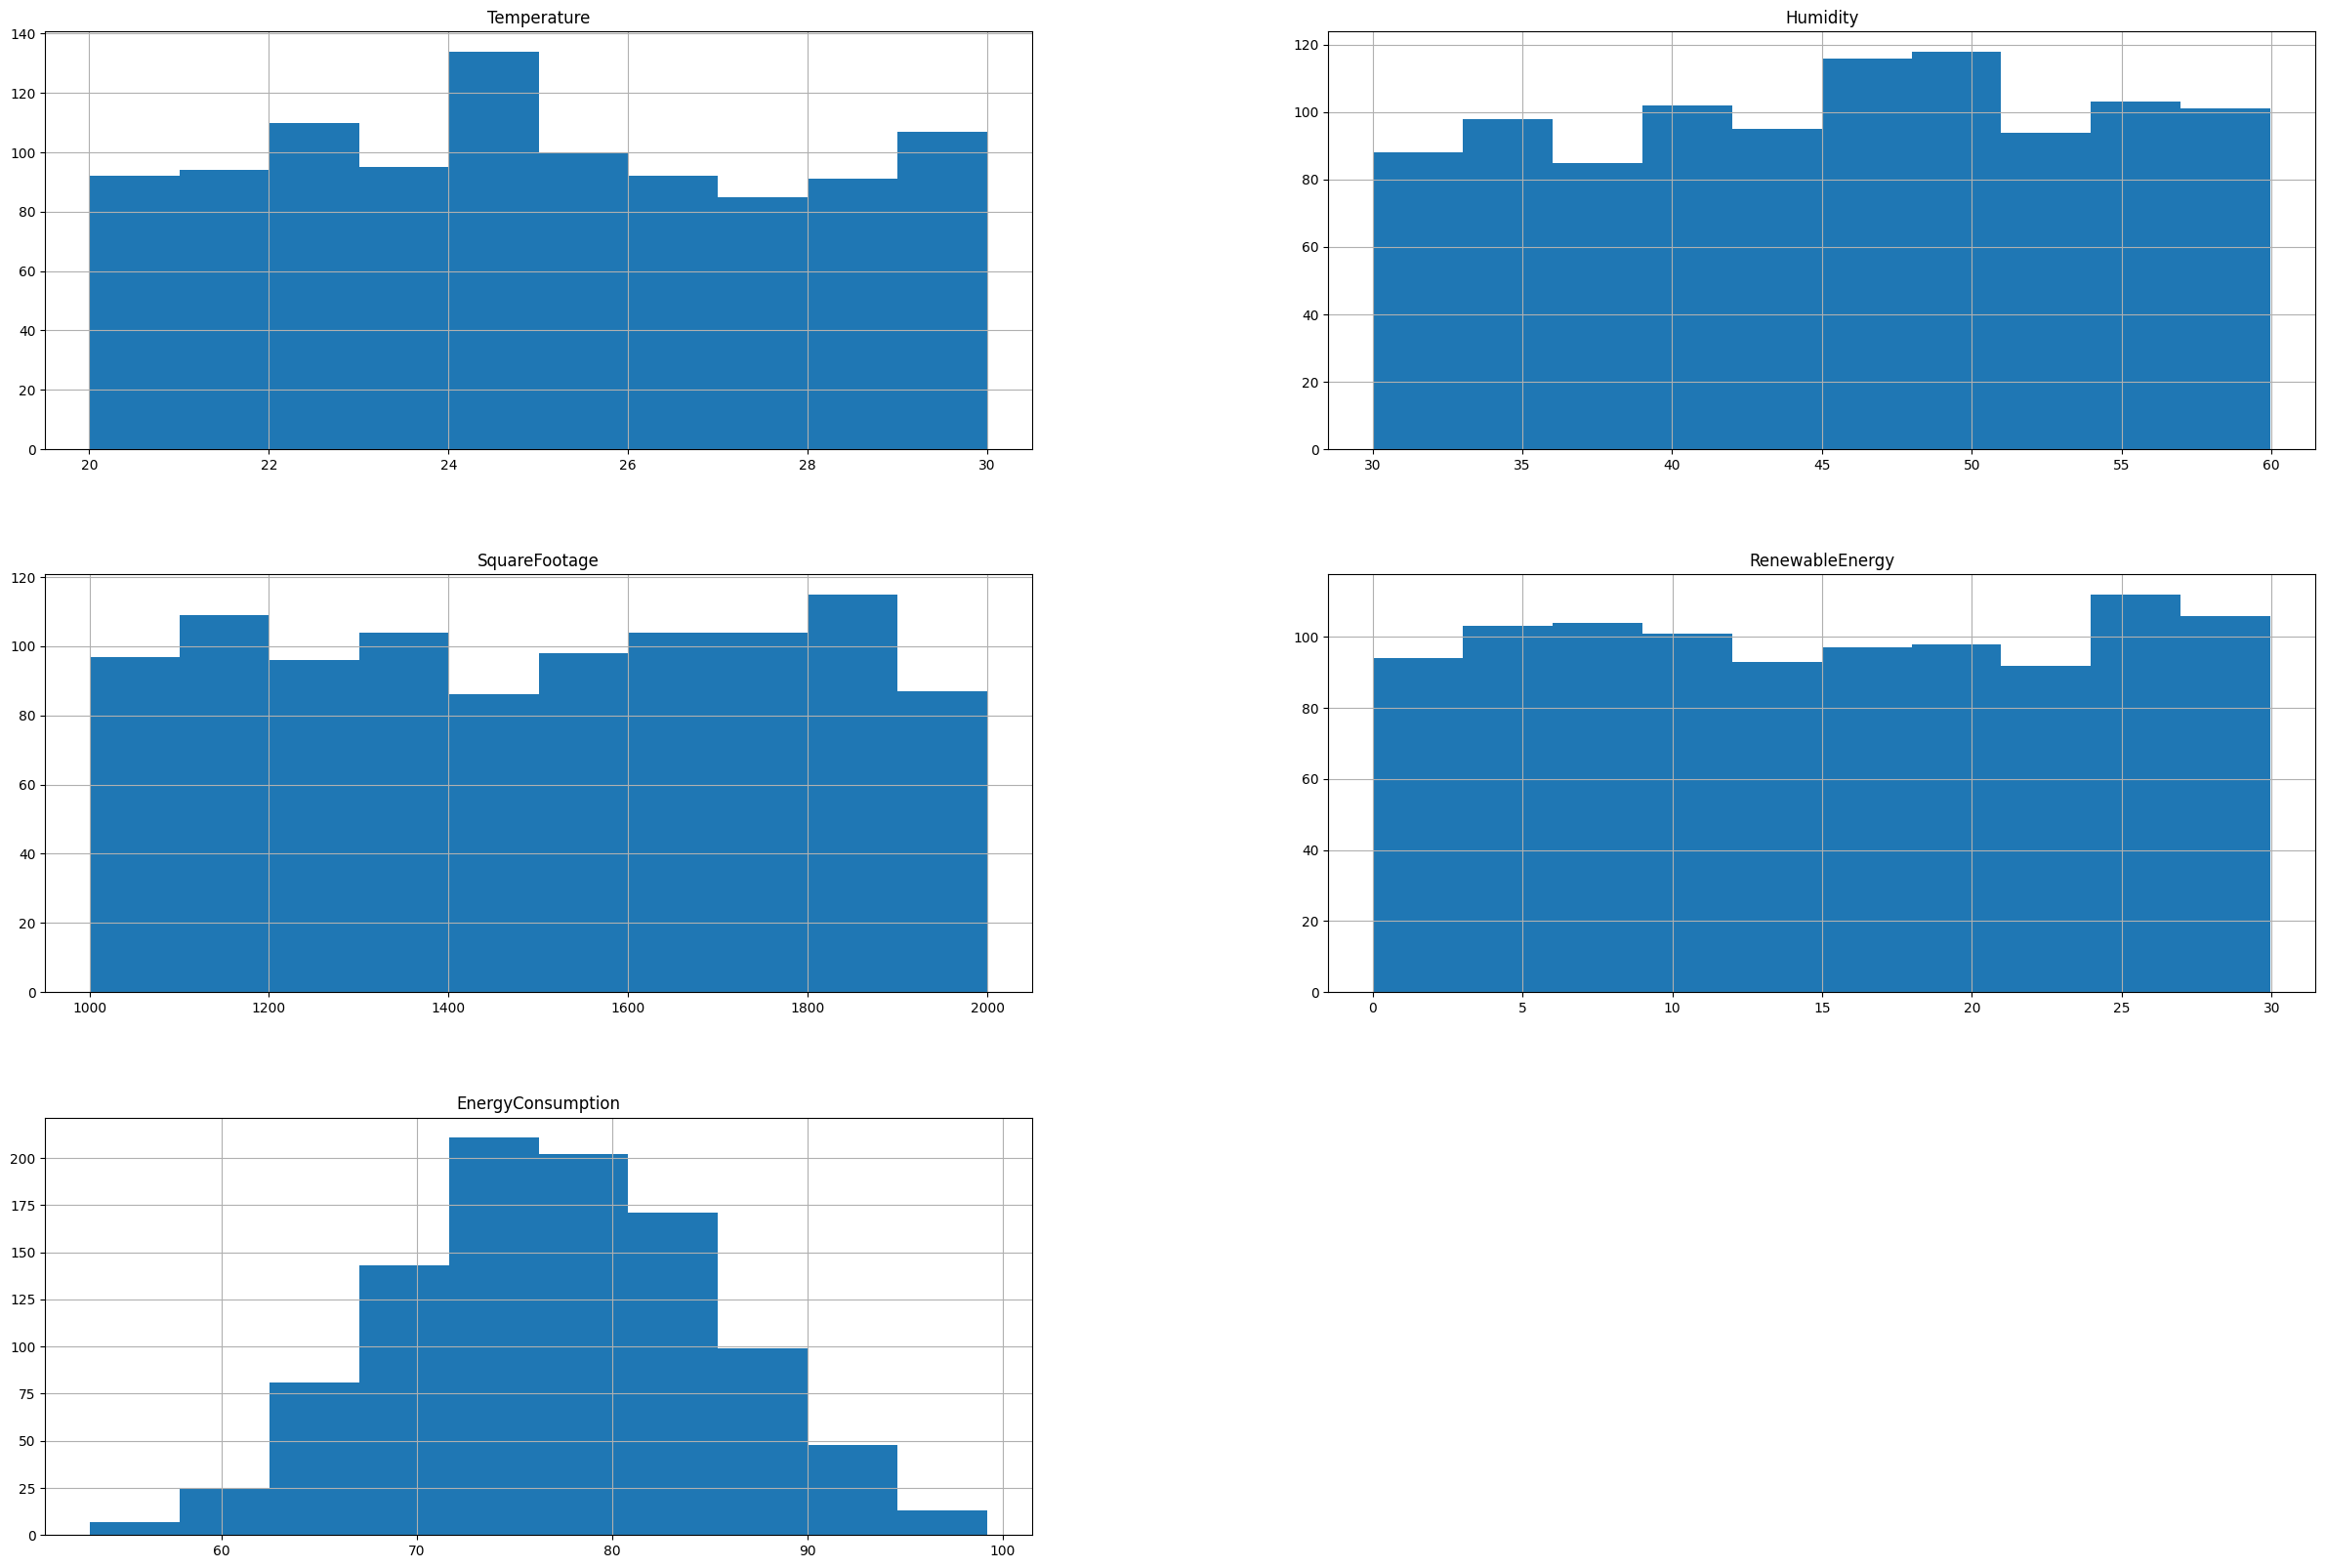

In [22]:
features = ['Temperature','Humidity','SquareFootage','RenewableEnergy','EnergyConsumption']
df[features].hist(figsize=(30,20))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

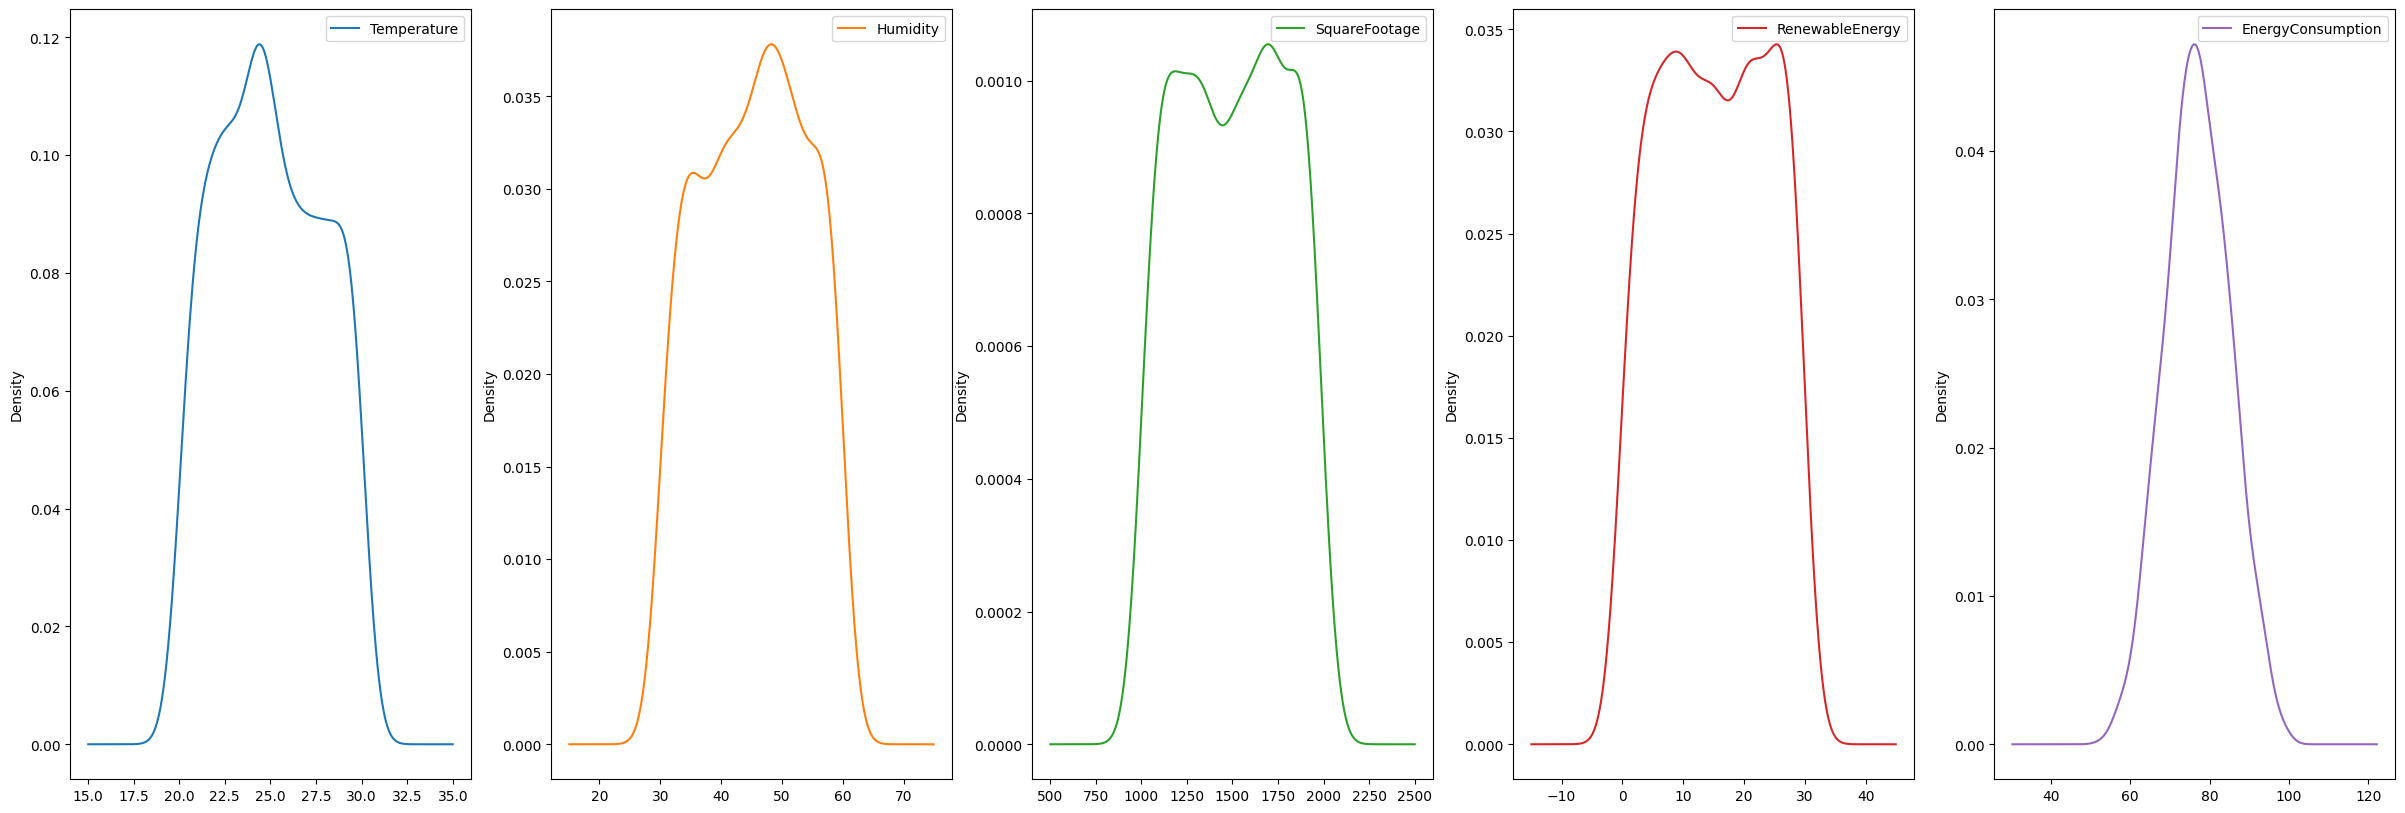

In [23]:
df[features].plot(kind='density',subplots=True, layout=(1,5),sharex=False,figsize=(30,10))

<Axes: xlabel='EnergyConsumption', ylabel='Density'>

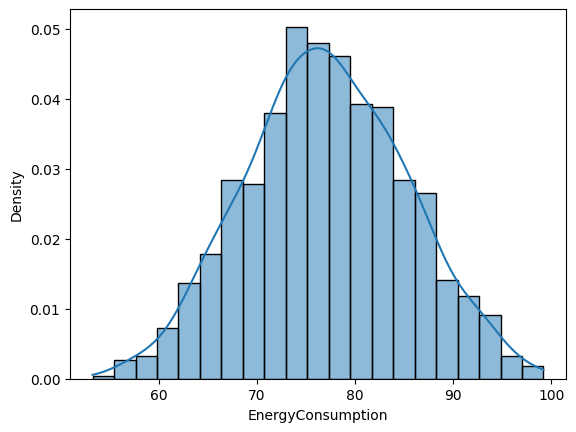

In [24]:
sns.histplot(df['EnergyConsumption'],kde=True,stat='density')

<Axes: xlabel='EnergyConsumption'>

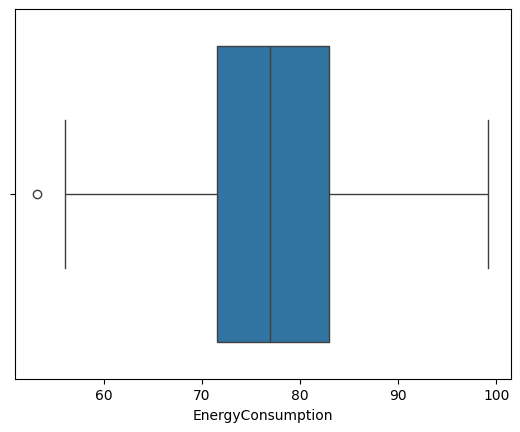

In [25]:
sns.boxplot(x='EnergyConsumption',data=df)

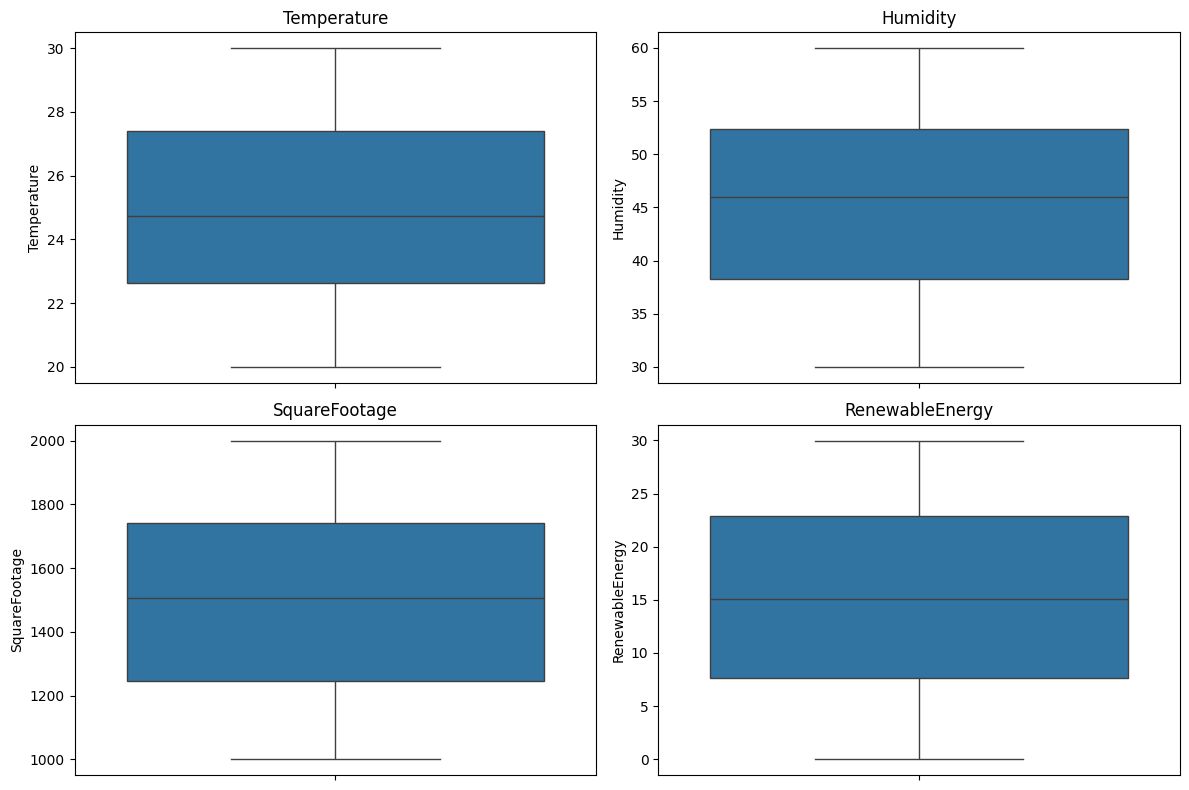

In [26]:
cols = ['Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, col in enumerate(cols):
    r, c = i // 2, i % 2
    sns.boxplot(df[col],ax=axes[r,c])
    axes[r, c].set_title(col)

plt.tight_layout()
plt.show()


<Axes: >

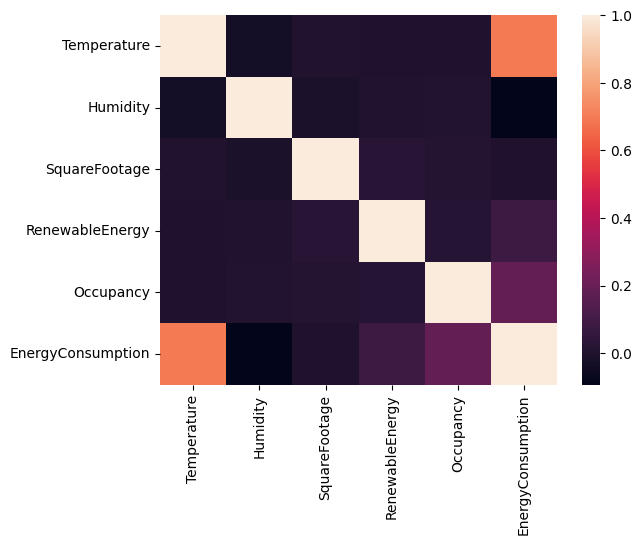

In [27]:
numerical_data = ['Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy','Occupancy','EnergyConsumption']
cor_matrix = df[numerical_data].corr()
sns.heatmap(cor_matrix)

<Axes: xlabel='EnergyConsumption', ylabel='Temperature'>

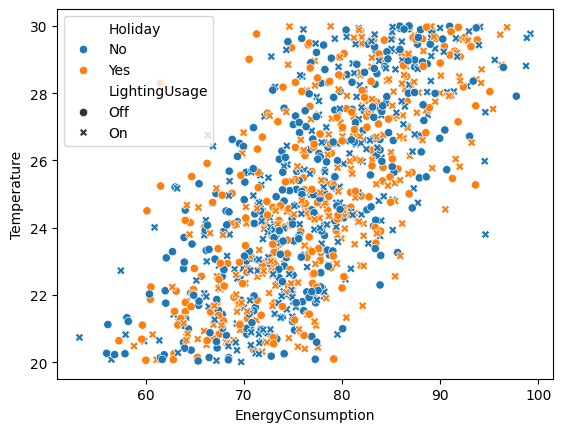

In [28]:
sns.scatterplot(x= 'EnergyConsumption',y='Temperature',hue='Holiday',data=df,style='LightingUsage')

<Axes: xlabel='EnergyConsumption', ylabel='RenewableEnergy'>

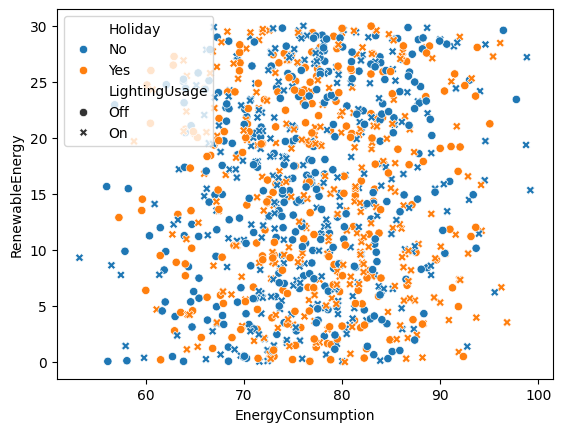

In [29]:
sns.scatterplot(x= 'EnergyConsumption',y='RenewableEnergy',hue='Holiday',data=df,style='LightingUsage')

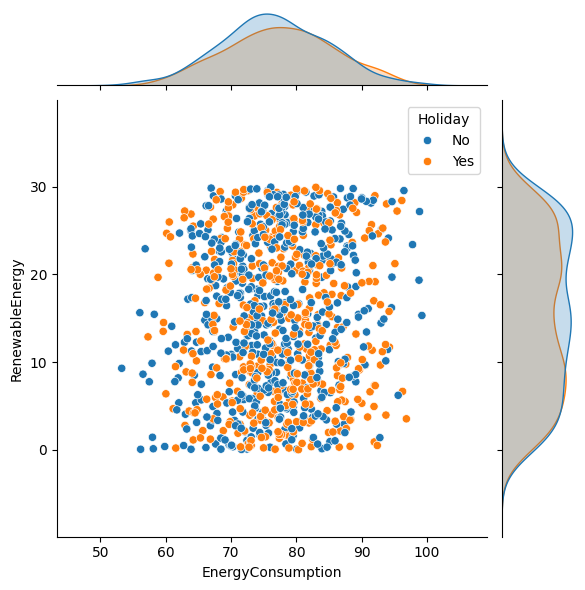

In [30]:
sns.jointplot(x= 'EnergyConsumption',y='RenewableEnergy',hue='Holiday',data=df)

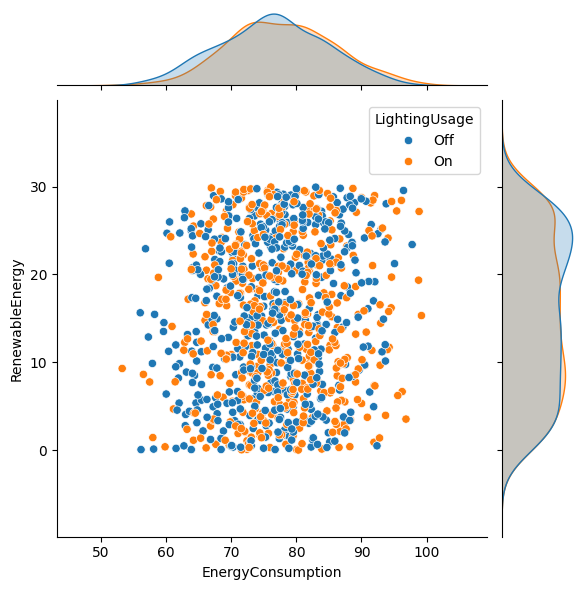

In [31]:
sns.jointplot(x= 'EnergyConsumption',y='RenewableEnergy',data=df,hue='LightingUsage')

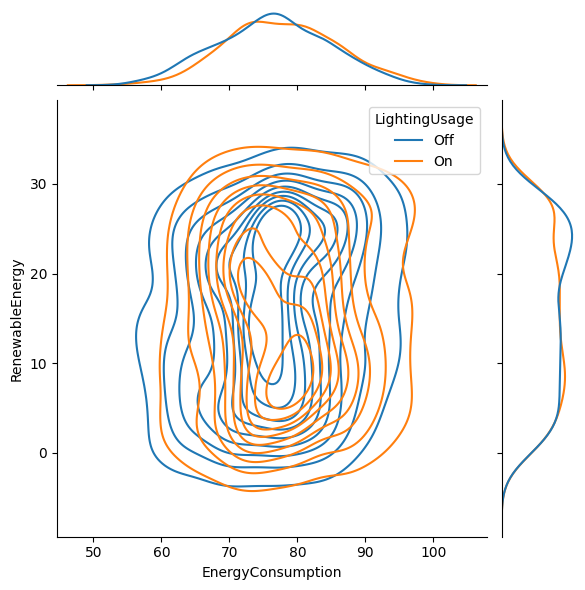

In [32]:
sns.jointplot(x= 'EnergyConsumption',y='RenewableEnergy',data=df,hue='LightingUsage',kind='kde')

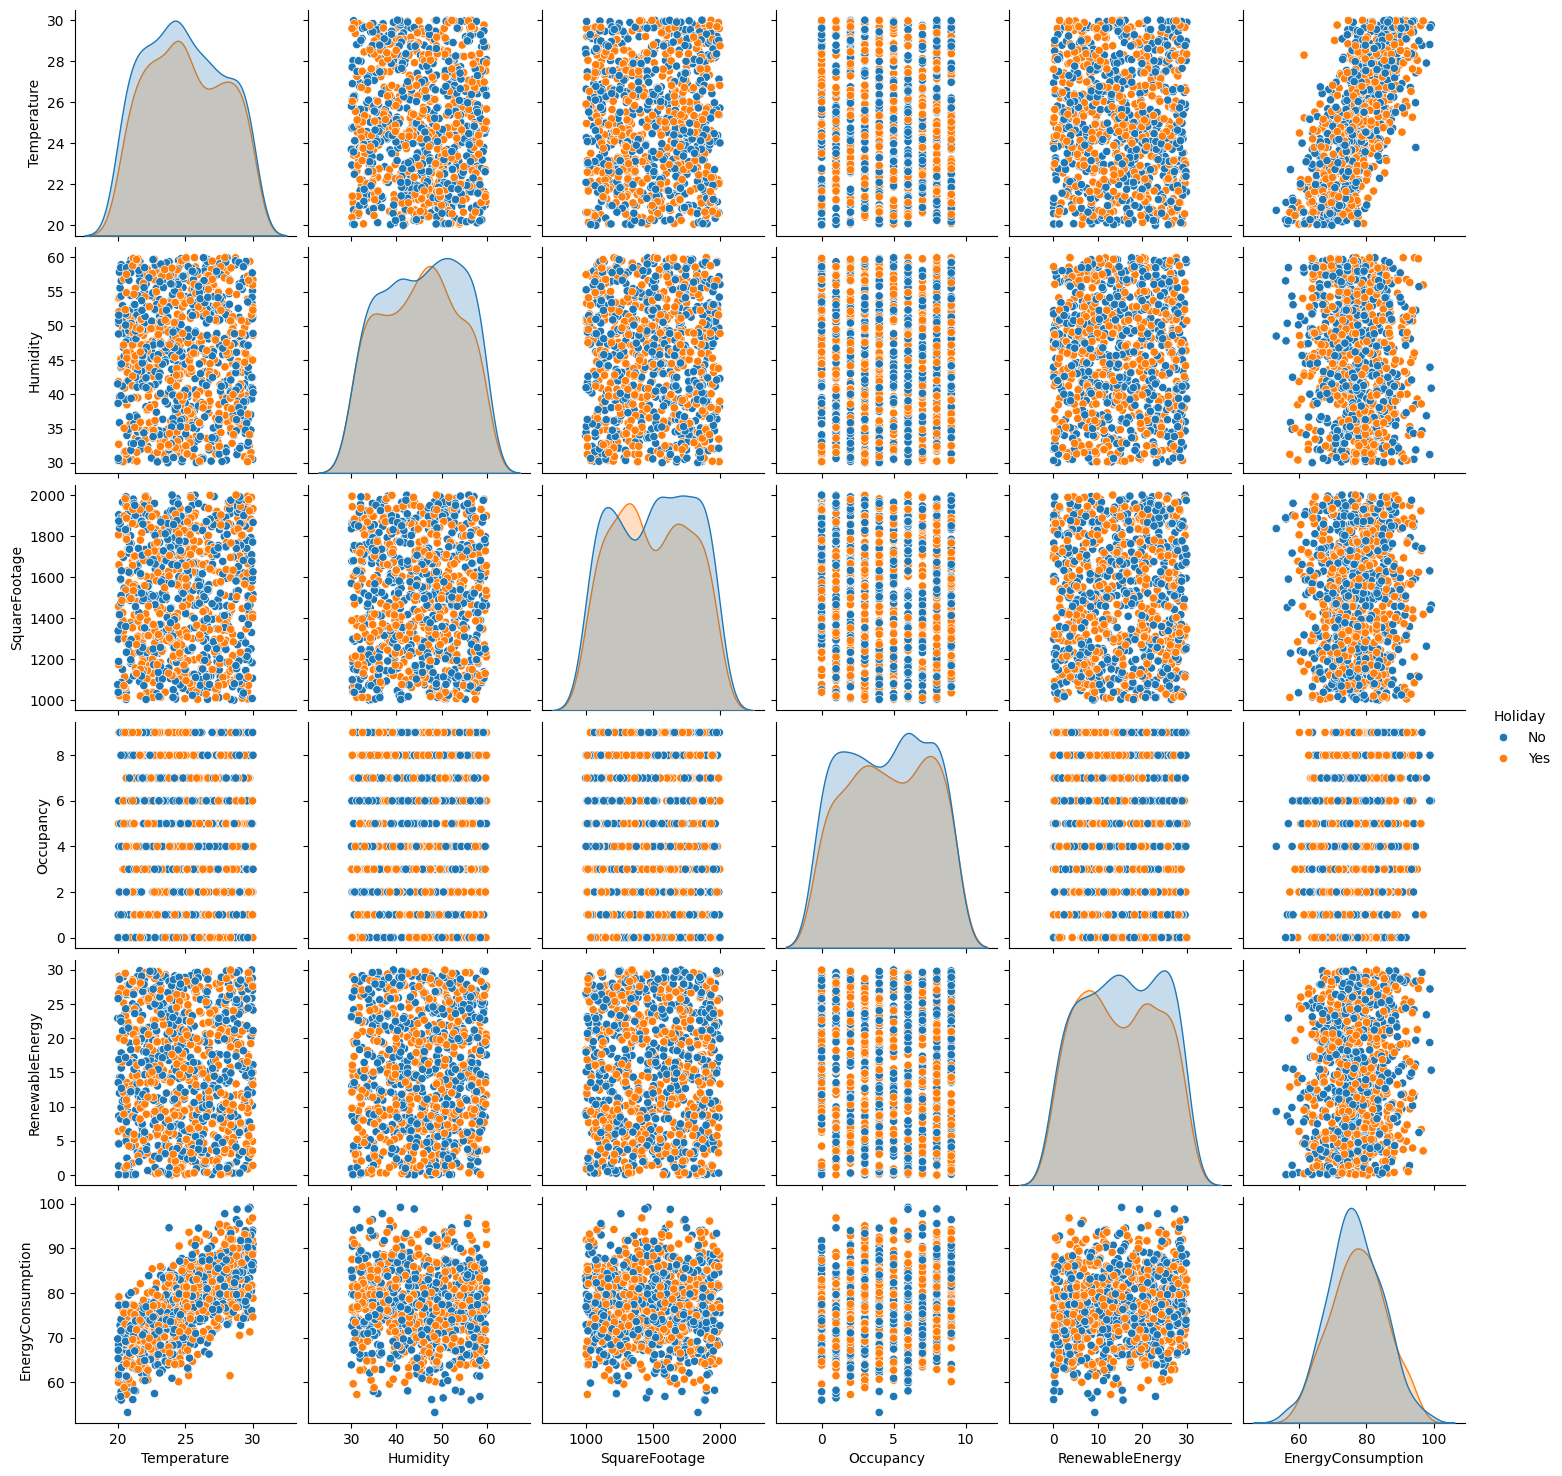

In [33]:
sns.pairplot(data=df,hue='Holiday')

In [34]:
df.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

In [35]:
label = {'On':1,'Off':0}
df['HVACUsage'] = df['HVACUsage'].map(label)

In [36]:
df['HVACUsage'] = df['HVACUsage'].astype(np.int64)

In [37]:
df['LightingUsage'] = df['LightingUsage'].map(label)
df['LightingUsage'] = df['LightingUsage'].astype(np.int64)

In [38]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [39]:
le= LabelEncoder()
holiday = le.fit_transform(df['Holiday'])

In [40]:
df['Holiday'] = holiday

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   int64  
 6   LightingUsage      1000 non-null   int64  
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   int64  
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 86.1+ KB


In [42]:
X =df[['Temperature', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'Holiday']]
y = df[['EnergyConsumption']]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Models

In [49]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge,ElasticNet


In [50]:
linear = LinearRegression()
lasso = Lasso(alpha=0.5)
ridge = Ridge(alpha=1)
net = ElasticNet(alpha=.8)

In [51]:
linear.fit(X_train_scaled,y_train)
lasso.fit(X_train_scaled,y_train)
ridge.fit(X_train_scaled,y_train)
net.fit(X_train_scaled,y_train)

ElasticNet(alpha=0.8)

In [52]:
linear_predict = linear.predict(X_test_scaled)
ridge_predict = ridge.predict(X_test_scaled)
lasso_predict = lasso.predict(X_test_scaled)
net_predict = net.predict(X_test_scaled)

Text(0.5, 1.0, 'Prediction using Linear Regression')

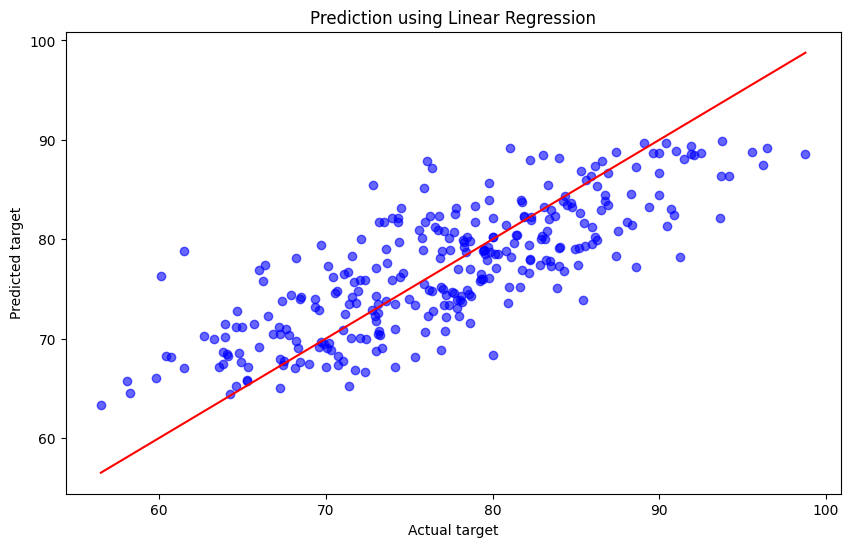

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,linear_predict,color='blue',alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using Linear Regression")

Text(0.5, 1.0, 'Prediction using Lasso Regression')

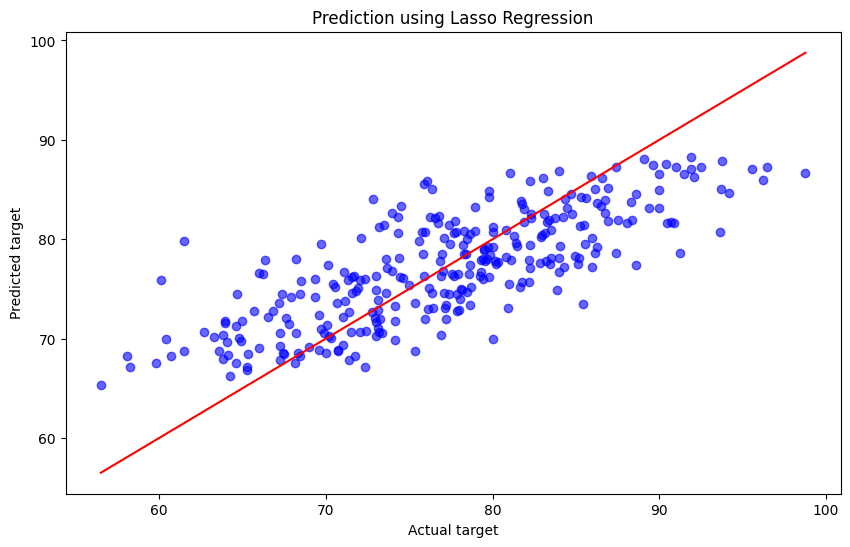

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,lasso_predict,color='blue',alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using Lasso Regression")

Text(0.5, 1.0, 'Prediction using ElasticNet Regression')

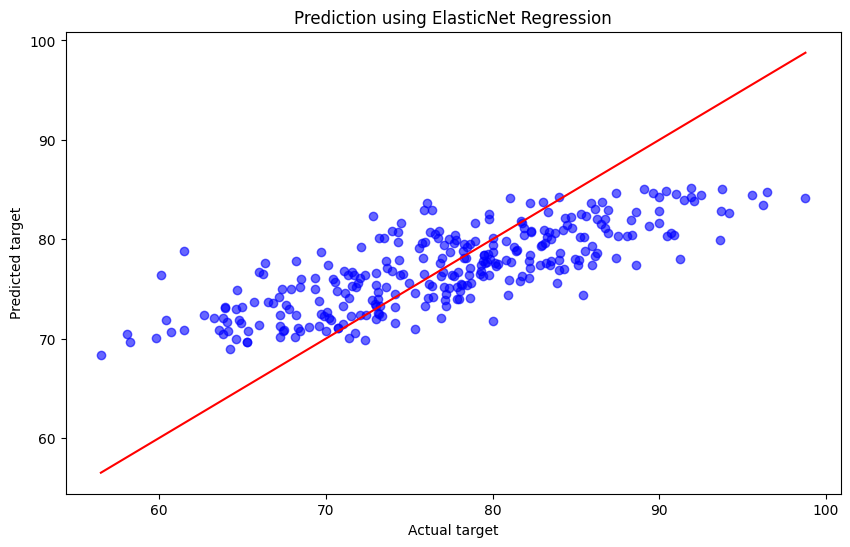

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,net_predict,color='blue',alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using ElasticNet Regression")

Text(0.5, 1.0, 'Prediction using Ridge Regression')

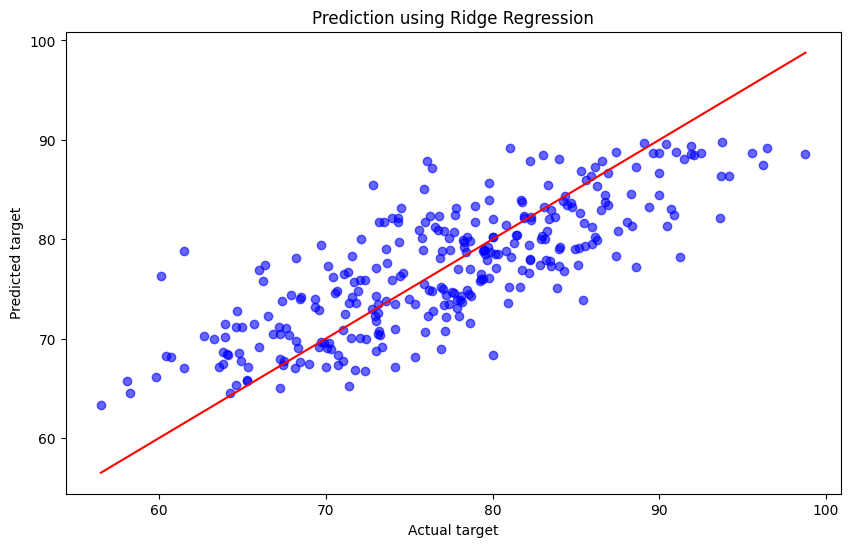

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,ridge_predict,color='blue',alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using Ridge Regression")

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
def calc_error(actual,predict):
    return mean_squared_error(actual,predict)

In [59]:
print(f"The mse of linear regression is {calc_error(y_test,linear_predict)}")
print(f"The mse of ridge regression is {calc_error(y_test,ridge_predict)}")
print(f"The mse of lasso regression is {calc_error(y_test,lasso_predict)}")
print(f"The mse of ElasticNet regression is {calc_error(y_test,net_predict)}")

The mse of linear regression is 25.68247408918204
The mse of ridge regression is 25.684994880750878
The mse of lasso regression is 27.32656804582759
The mse of ElasticNet regression is 31.952071173904514


# HyperParameter Tuning For Linear Models

In [61]:
param_grid = {
    "alpha": [0.1,0.4,0.5,0.7,1]
}

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
grid1 = GridSearchCV(Lasso(),param_grid,cv=5,scoring='r2',n_jobs=2)

In [64]:
grid1.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=2,
             param_grid={'alpha': [0.1, 0.4, 0.5, 0.7, 1]}, scoring='r2')

In [65]:
model= grid1.best_estimator_

In [66]:
predict = model.predict(X_test_scaled)
calc_error(y_test,predict)

25.792743855824256

Text(0.5, 1.0, 'Prediction using Lasso Regression after hyperparameter tuning')

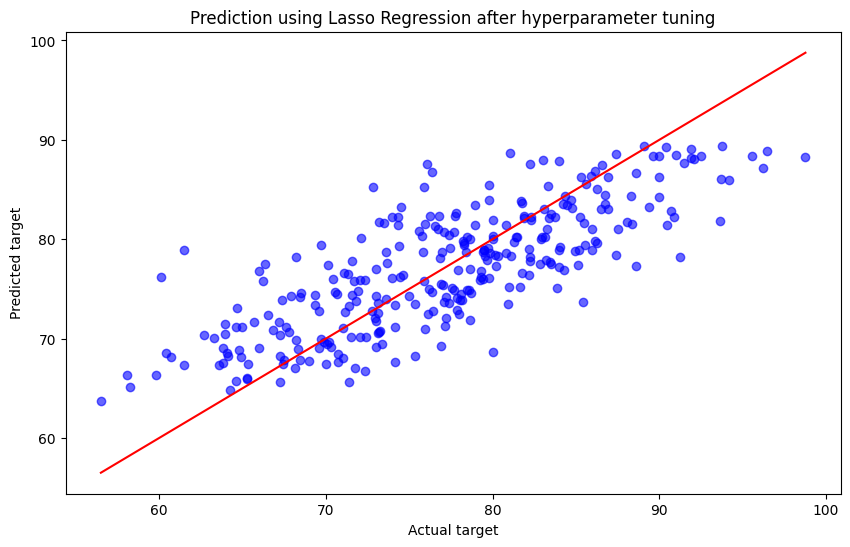

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predict,color='blue',alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using Lasso Regression after hyperparameter tuning")

In [68]:
grid2 = GridSearchCV(ElasticNet(),param_grid,cv=5,scoring='r2',n_jobs=2)

In [69]:
grid2.fit(X_train_scaled,y_train)
predict = grid2.predict(X_test_scaled)
calc_error(y_test,predict)

25.95216139574137

Text(0.5, 1.0, 'Prediction using ElasticNet Regression after hyperparameter tuning')

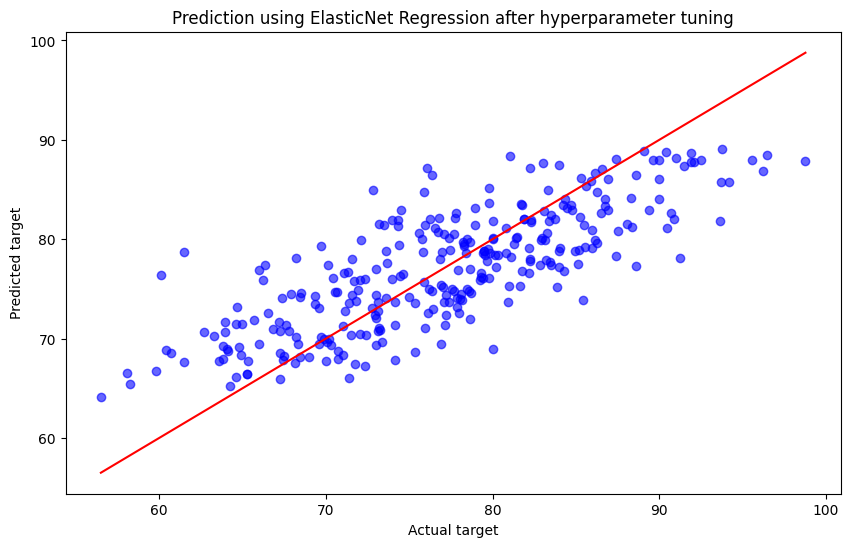

In [70]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predict,color='blue',alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using ElasticNet Regression after hyperparameter tuning")

In [71]:
with open('linearRegression.pkl', 'wb') as f:
    pickle.dump(linear, f)
with open('Lasso.pkl', 'wb') as f:
    pickle.dump(grid1, f)
with open('ElasticNet.pkl', 'wb') as f:
    pickle.dump(grid2, f)
with open('Ridge.pkl', 'wb') as f:
    pickle.dump(ridge, f)


# KNN

In [73]:
from sklearn.neighbors import KNeighborsRegressor

In [74]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [75]:
knn_predict = knn.predict(X_test_scaled)

In [76]:
print(f"Mse error is {calc_error(y_test,knn_predict)}")

Mse error is 35.95760217826974


Text(0.5, 1.0, 'Prediction using KNN')

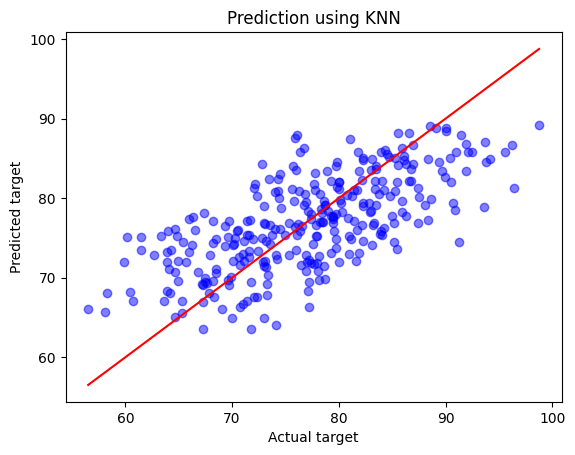

In [77]:
plt.scatter(y_test,knn_predict,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using KNN")

In [78]:
param_grid = {
    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "n_neighbors": [2,5,10,15,18,20],
    "weights" : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}
    

In [79]:
grid3 = GridSearchCV(KNeighborsRegressor(),param_grid,cv=5,scoring='r2',n_jobs=2)

In [80]:
grid3.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=2,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [2, 5, 10, 15, 18, 20],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [81]:
knn_predict2 = grid3.predict(X_test_scaled)
print(f"The mse score is {calc_error(y_test,knn_predict2)}")

The mse score is 32.66605845543628


Text(0.5, 1.0, 'Prediction using KNN after hyperParameter Tuning')

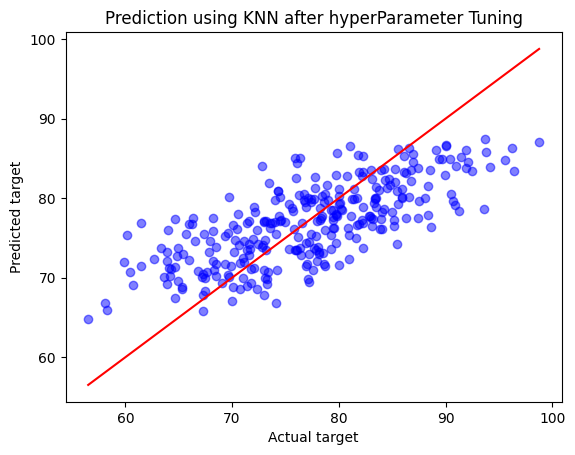

In [82]:
plt.scatter(y_test,knn_predict2,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using KNN after hyperParameter Tuning")

In [83]:
with open('knn.pkl', 'wb') as f:
    pickle.dump(grid3, f)

# Support Vector Machine

In [85]:
from sklearn.svm import SVR

In [86]:
svr = SVR()
svr.fit(X_train_scaled,y_train.values)

C:\Users\eru\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [87]:
svr_predict = svr.predict(X_test_scaled)
print(f"Mse error is {calc_error(y_test,svr_predict)}")

Mse error is 30.381519555790263


Text(0.5, 1.0, 'Prediction using SVR')

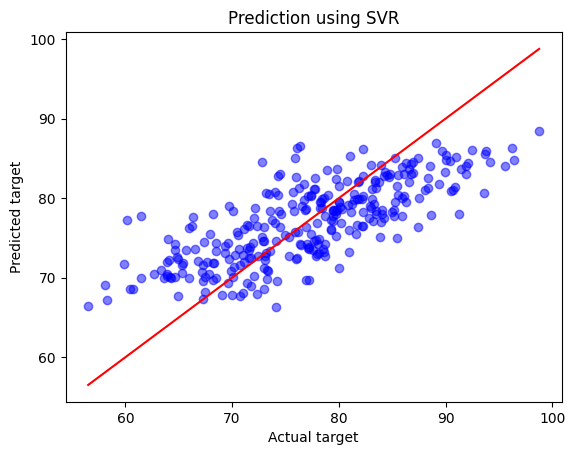

In [88]:
plt.scatter(y_test,svr_predict,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using SVR")

In [89]:
param_grid ={
    'kernel' :['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma" :['auto',"scale"],
    "degree" : [2,3,5]
}

In [90]:
grid4 = GridSearchCV(SVR(),param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=2)

In [91]:
grid4.fit(X_train_scaled,y_train)

C:\Users\eru\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=2,
             param_grid={'degree': [2, 3, 5], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [92]:
svr_predict2 = grid4.predict(X_test_scaled)
calc_error(y_test,svr_predict2)

25.86888407232092

Text(0.5, 1.0, 'Prediction using SVR')

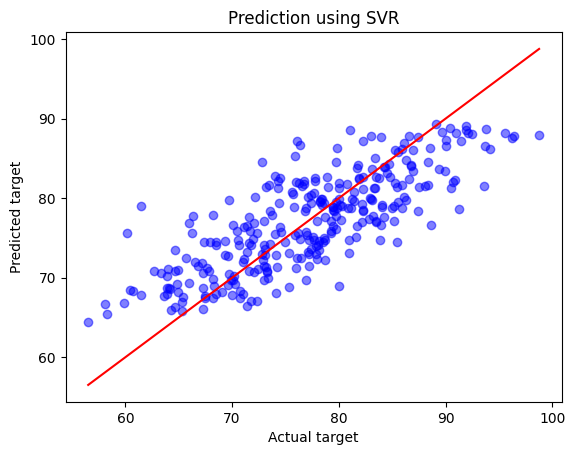

In [93]:
plt.scatter(y_test,svr_predict2,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using SVR")

In [94]:
with open('svr.pkl', 'wb') as f:
    pickle.dump(grid4, f)

# Decision Tree

In [96]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_scaled,y_train)
dtr_predict = dtr.predict(X_test_scaled)
print(f"Mse error is {calc_error(y_test,dtr_predict)}")

Mse error is 57.87299200492465


Text(0.5, 1.0, 'Prediction using Decision Tree Regressor')

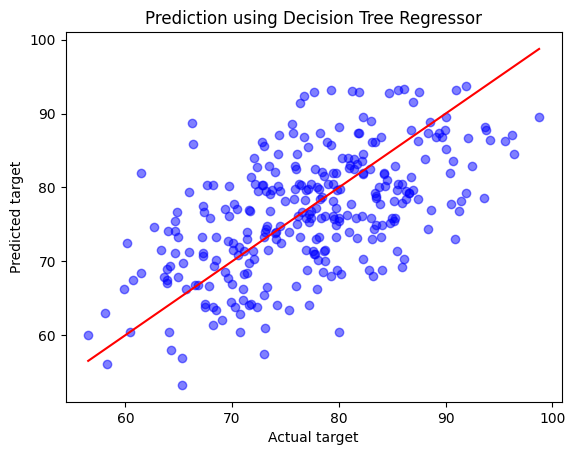

In [98]:
plt.scatter(y_test,dtr_predict,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using Decision Tree Regressor")

[Text(0.5, 0.9, 'x[0] <= 0.16\nsquared_error = 65.608\nsamples = 700\nvalue = 77.014'),
 Text(0.25, 0.7, 'x[0] <= -0.946\nsquared_error = 40.359\nsamples = 403\nvalue = 72.661'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[3] <= -0.009\nsquared_error = 35.076\nsamples = 156\nvalue = 69.605'),
 Text(0.0625, 0.3, 'x[2] <= -0.027\nsquared_error = 39.56\nsamples = 77\nvalue = 67.52'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'x[0] <= -1.676\nsquared_error = 22.336\nsamples = 79\nvalue = 71.638'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'x[3] <= -0.009\nsquared_error = 34.071\nsamples = 247\nvalue = 74.591'),
 Text(0.3125, 0.3, 'x[2] <= 1.028\nsquared_error = 30.01\nsamples = 120\nvalue = 72.056'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'x[0] <= -0.416\nsquared_error = 26.093\nsamples = 127\nvalue = 76.987'),
 Text(0.40625,

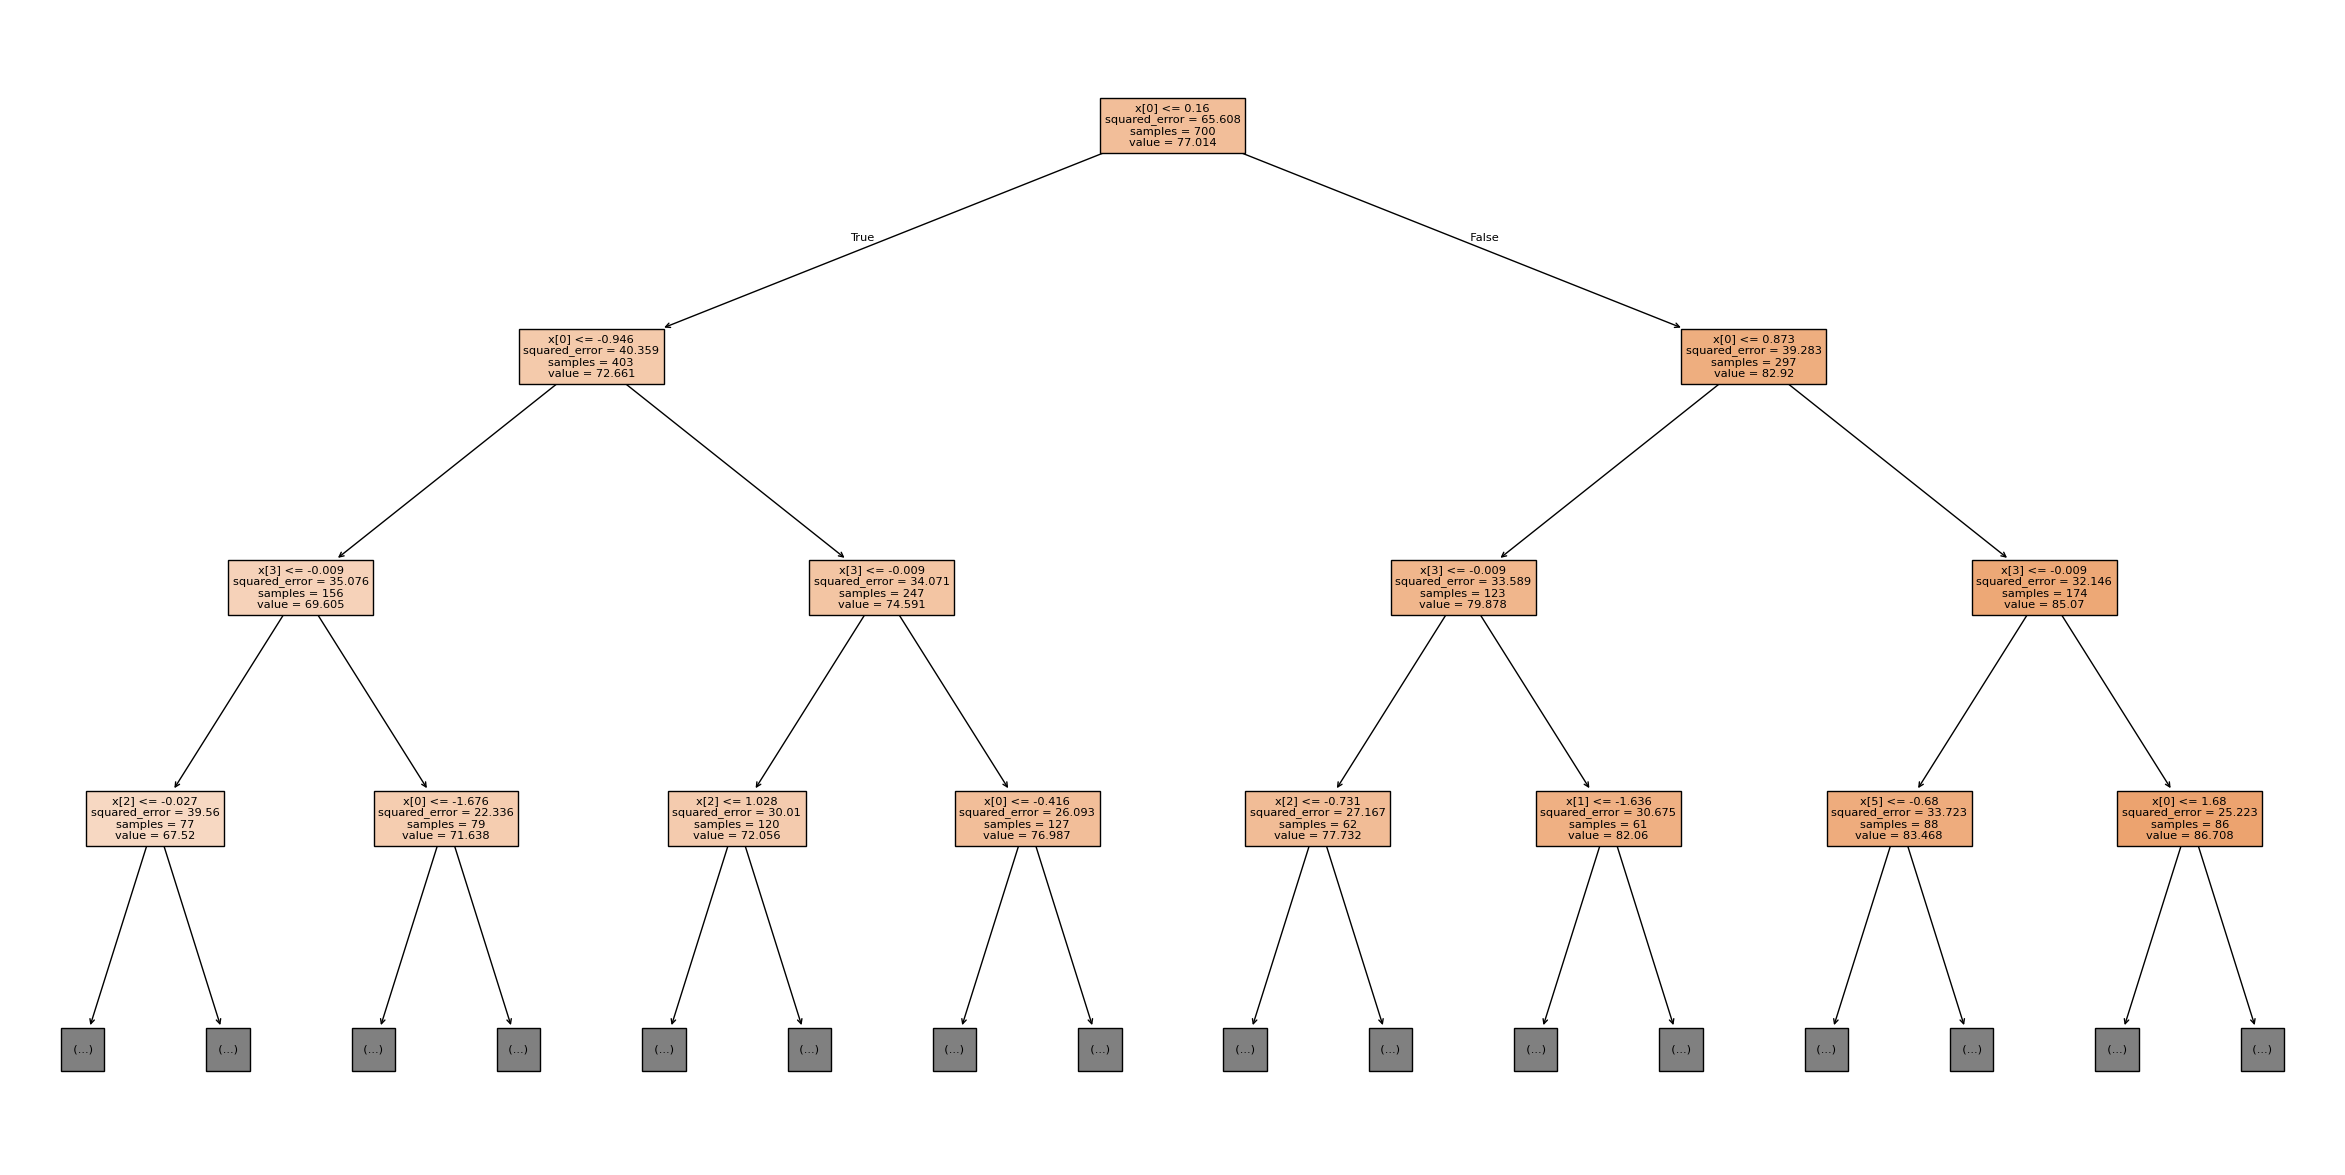

In [99]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(dtr,max_depth=3,filled=True)

In [100]:
param_grid = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
    'splitter' : ["best", "random"],
    'max_features': ["sqrt", "log2"],
    'max_depth': [None,3,5,7],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,3,4,5]
}

In [101]:
grid5 = GridSearchCV(DecisionTreeRegressor(),param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=2)

In [102]:
grid5.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=2,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 4, 5],
                         'min_samples_split': [2, 4, 6],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [103]:
dtr_predict2 = grid5.predict(X_test_scaled)
print(f"Mse error is {calc_error(y_test,dtr_predict2)}")

Mse error is 51.88473035532645


Text(0.5, 1.0, 'Prediction using Decision Tree Regressor after hyperparameter tuning')

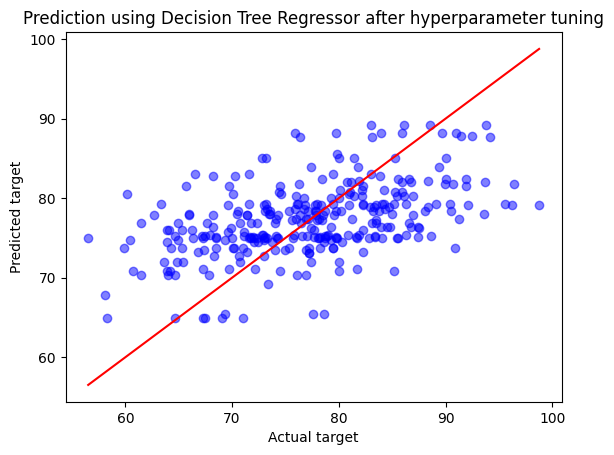

In [104]:
plt.scatter(y_test,dtr_predict2,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using Decision Tree Regressor after hyperparameter tuning")

In [105]:
with open('decisionTree.pkl', 'wb') as f:
    pickle.dump(grid5, f)

# Random Forest Regressor

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
forest = RandomForestRegressor()
forest.fit(X_train_scaled,y_train)
forest_predict = forest.predict(X_test_scaled)
calc_error(y_test,forest_predict)

C:\Users\eru\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


30.583796972951372

Text(0.5, 1.0, 'Prediction using Random Forest Regressor')

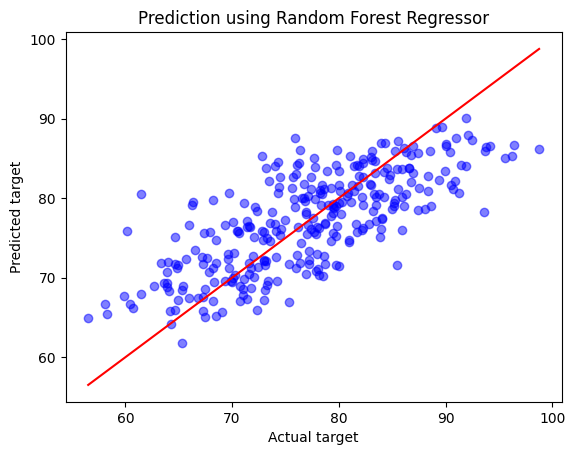

In [109]:
plt.scatter(y_test,forest_predict,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using Random Forest Regressor")

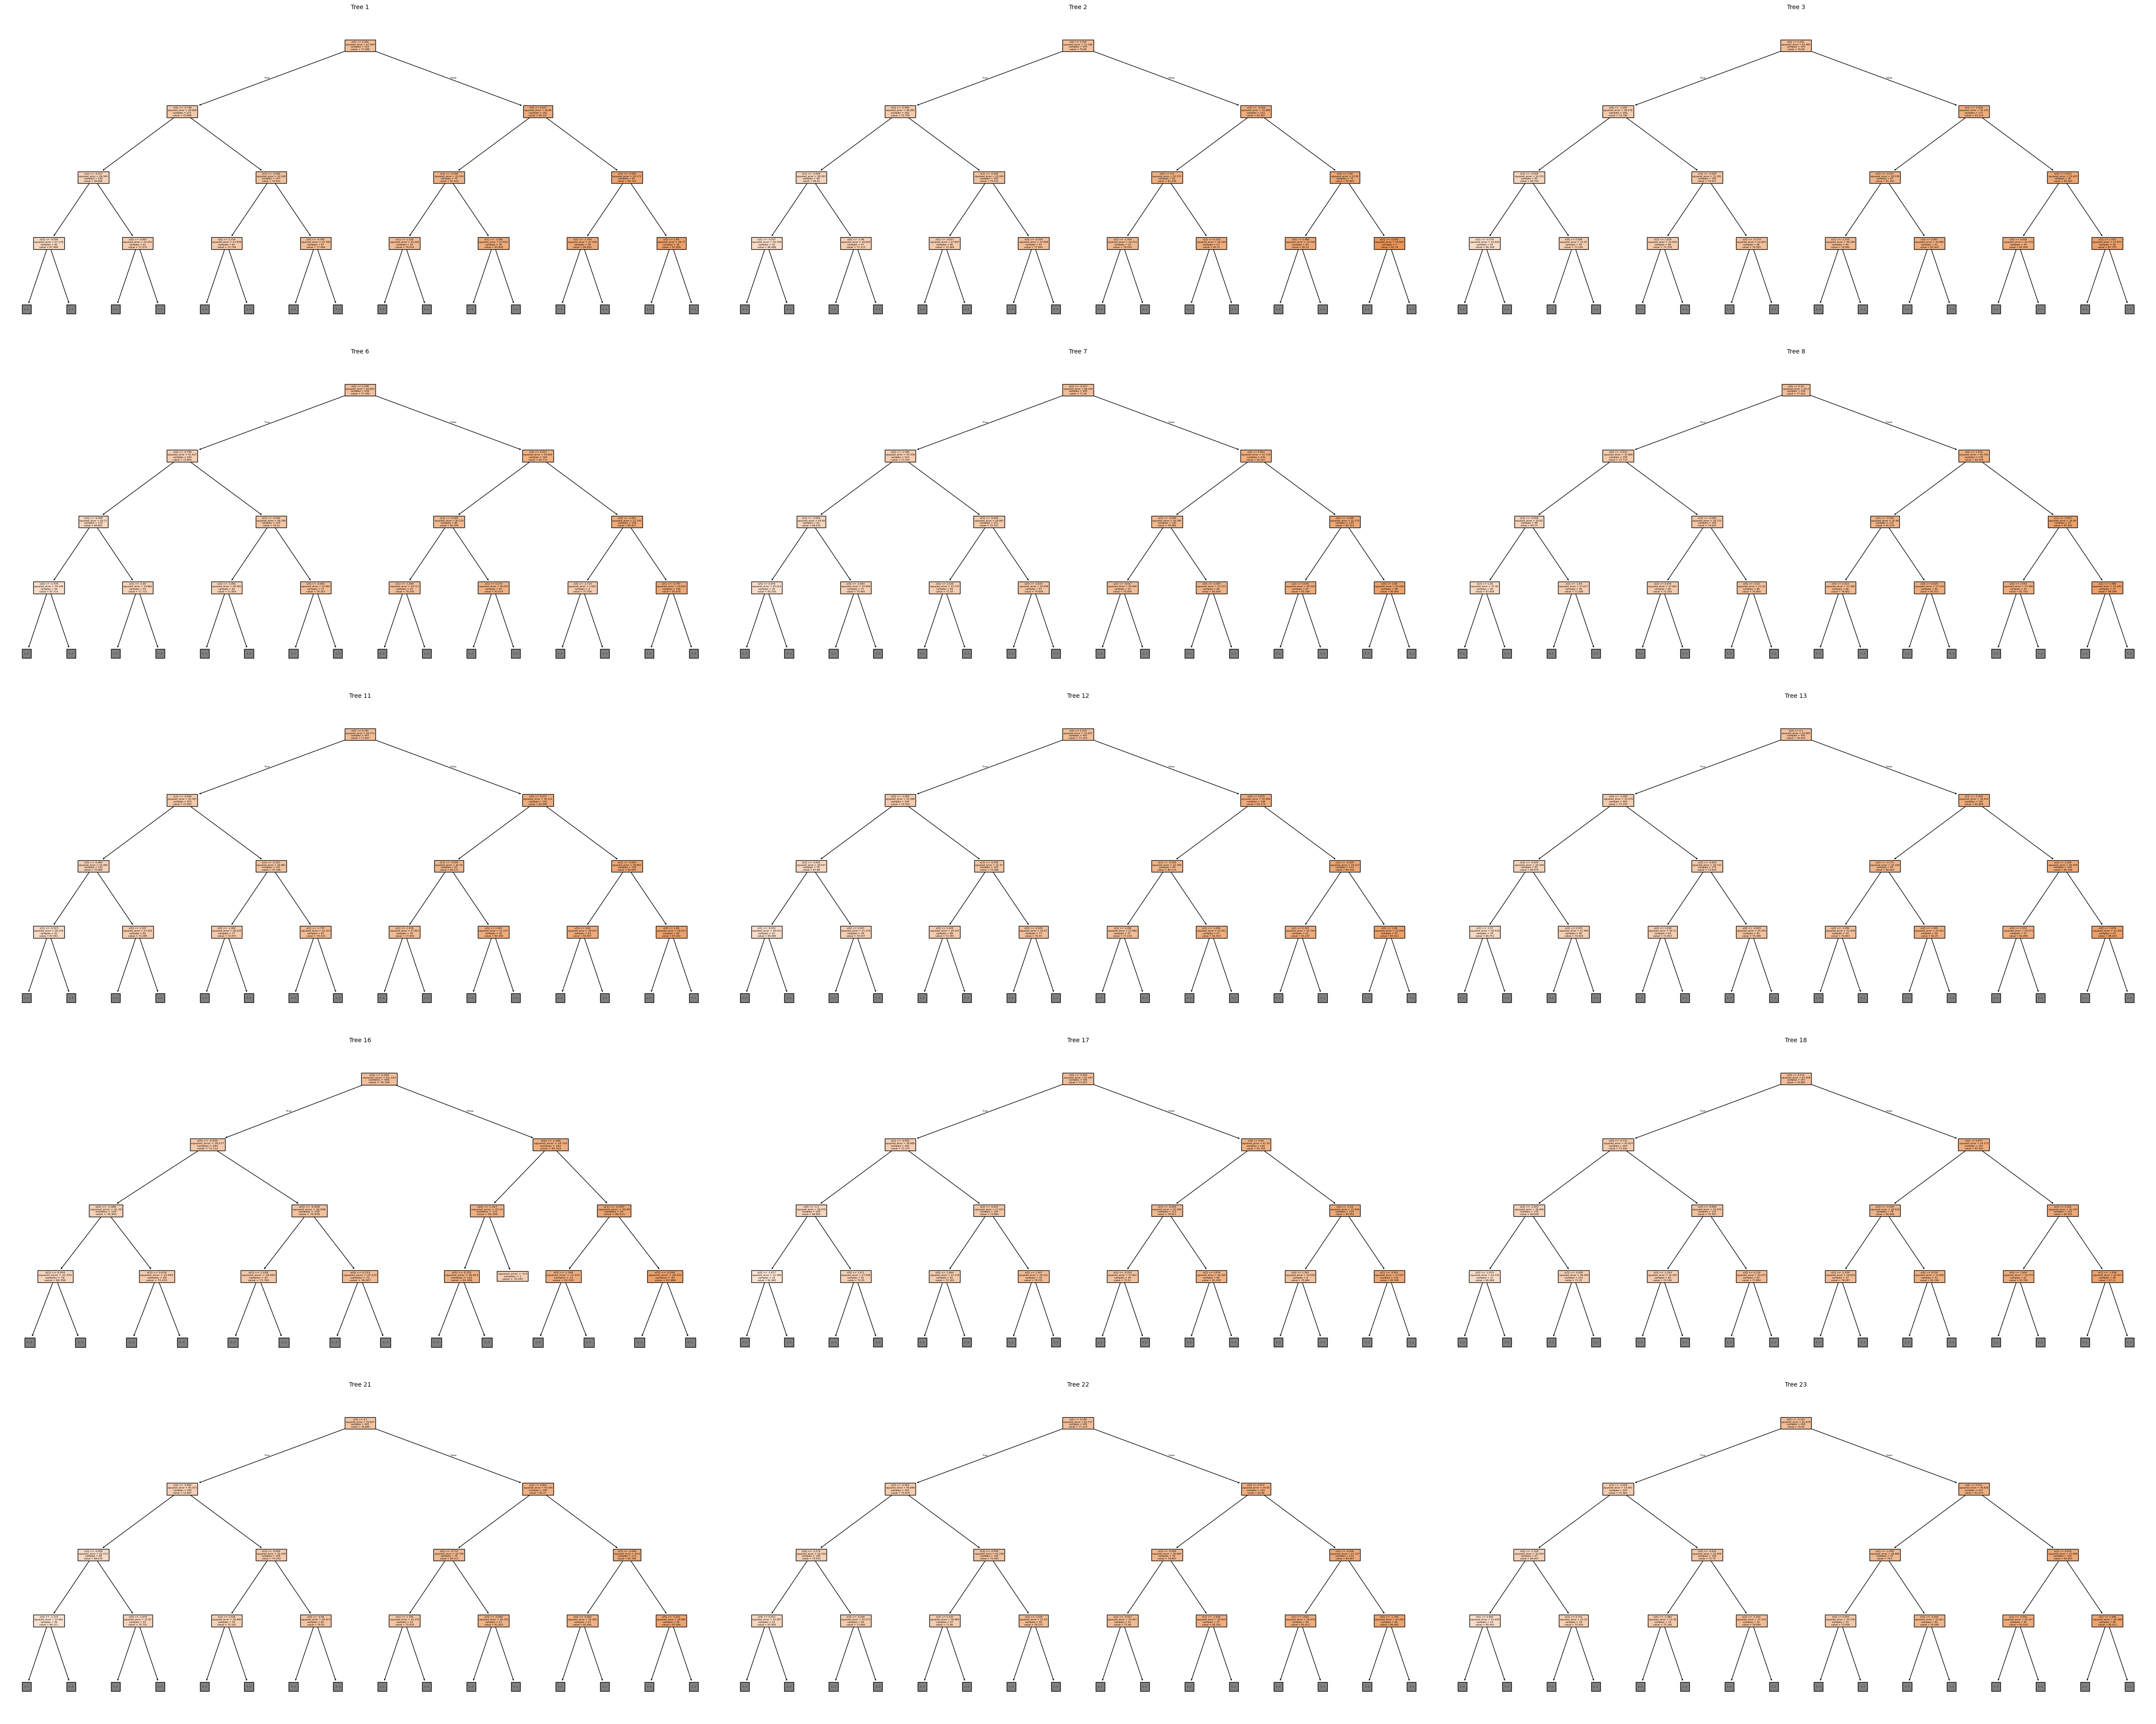

In [110]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(50, 40), dpi=100)
for i in range(5):
    for j in range(3):
        index = i * 5 + j
        plot_tree(forest.estimators_[index], filled=True, ax=axes[i, j],max_depth=3)
        axes[i, j].set_title(f"Tree {index + 1}", fontsize=10)
        axes[i, j].tick_params(labelsize=6)

plt.tight_layout()
plt.show()

In [111]:
param_grid = {
    'n_estimators': [50, 100, 150,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5,5],
    'min_samples_leaf': [1, 2,4],
    'max_features': ['sqrt', 'log2']
}


In [112]:
grid6 = GridSearchCV(RandomForestRegressor(),param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=2)

In [113]:
grid6.fit(X_train_scaled,y_train)
forest_predict2 = grid6.predict(X_test)
calc_error(y_test,forest_predict2)

C:\Users\eru\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\eru\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


157.48185230229112

Text(0.5, 1.0, 'Prediction using Random Forest Regressor after hyperparameter tuning')

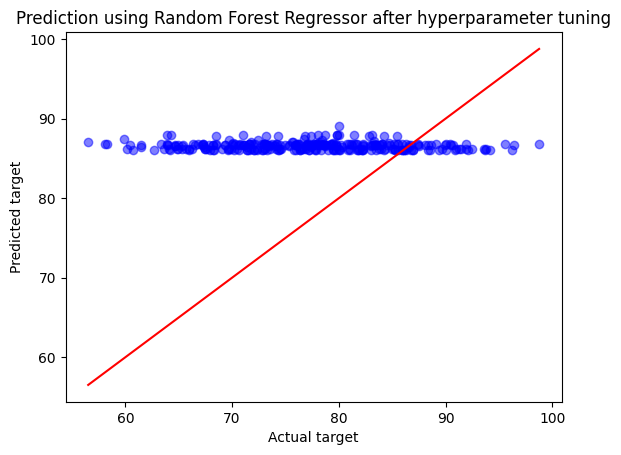

In [114]:
plt.scatter(y_test,forest_predict2,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using Random Forest Regressor after hyperparameter tuning")

In [115]:
with open('RandomForest.pkl', 'wb') as f:
    pickle.dump(grid6, f)

# AdaForest  Regressor

In [117]:
from sklearn.ensemble import AdaBoostRegressor

In [118]:
ada = AdaBoostRegressor()
ada.fit(X_train_scaled,y_train)
ada_predict = ada.predict(X_test_scaled)
calc_error(y_test,ada_predict)

C:\Users\eru\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30.31229543045333

Text(0.5, 1.0, 'Prediction using Ada Boost Regressor')

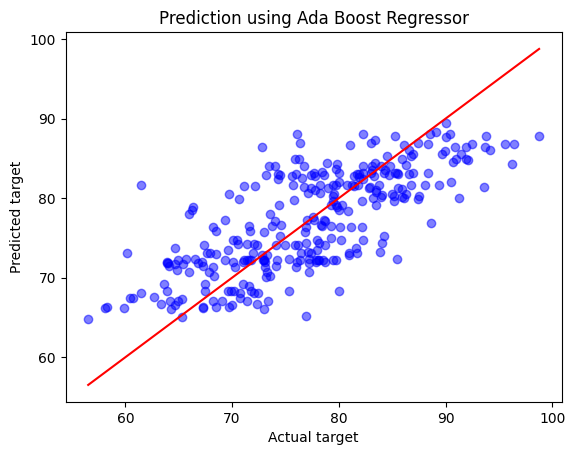

In [119]:
plt.scatter(y_test,ada_predict,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using Ada Boost Regressor")

In [120]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential']
}
grid7 = GridSearchCV(AdaBoostRegressor(),param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=2)

In [121]:
grid7.fit(X_train_scaled,y_train)

C:\Users\eru\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=2,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [122]:
ada_predict2 = grid7.predict(X_test_scaled)
calc_error(y_test,ada_predict2)

30.620588435330937

Text(0.5, 1.0, 'Prediction using Ada Boost Regressor after hyper parameter tuning')

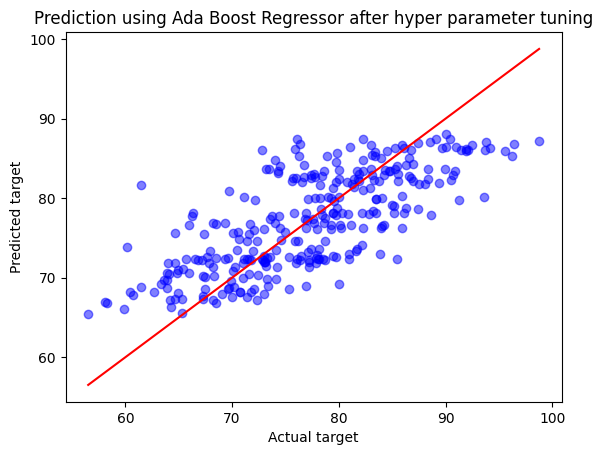

In [123]:
plt.scatter(y_test,ada_predict2,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using Ada Boost Regressor after hyper parameter tuning")

In [124]:
with open('AdaBoost.pkl', 'wb') as f:
    pickle.dump(grid7, f)

# Gradient Boost Regressor

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
gradient = GradientBoostingRegressor()
gradient.fit(X_train_scaled,y_train)
gradient_predict = gradient.predict(X_test_scaled)
calc_error(y_test,gradient_predict)

C:\Users\eru\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


29.8175714442929

Text(0.5, 1.0, 'Prediction using Gradient Boost Regressor')

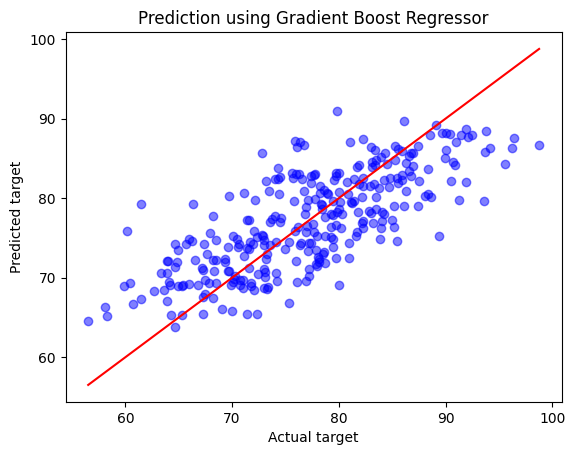

In [127]:
plt.scatter(y_test,gradient_predict,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using Gradient Boost Regressor")

In [128]:
param_grid = {
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'loss': ['huber', 'quantile', 'squared_error', 'absolute_error'],
    'criterion' :['friedman_mse', 'squared_error'],
    'max_depth': [4,5,7],
    'max_features' :['sqrt', 'log2']
    
    
}
grid8 = GridSearchCV(GradientBoostingRegressor(),param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=2)

In [129]:
grid8.fit(X_train_scaled,y_train)
gradient_predict2 = grid8.predict(X_test_scaled)
calc_error(y_test,gradient_predict2)

C:\Users\eru\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


30.467079468888866

Text(0.5, 1.0, 'Prediction using Gradient Boost Regressor after hyper parameter tuning')

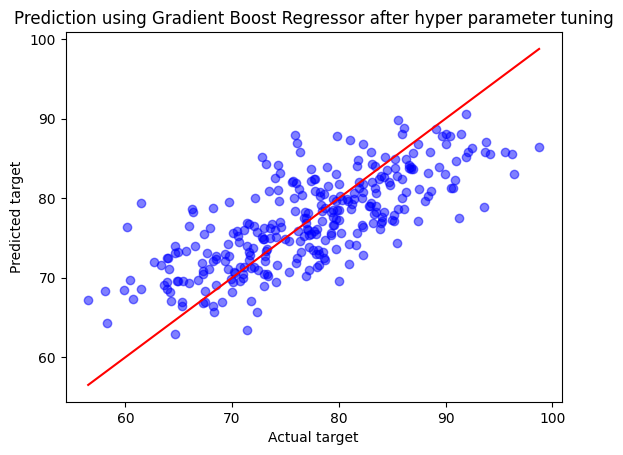

In [130]:
plt.scatter(y_test,gradient_predict2,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using Gradient Boost Regressor after hyper parameter tuning")


In [131]:
with open('GradientBoost.pkl', 'wb') as f:
    pickle.dump(grid8, f)

# XGBoost Regressor

In [133]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train_scaled,y_train)
xg_predict = xg.predict(X_test_scaled)
calc_error(y_test,xg_predict)

36.95304489135742

Text(0.5, 1.0, 'Prediction using XG Boost Regressor')

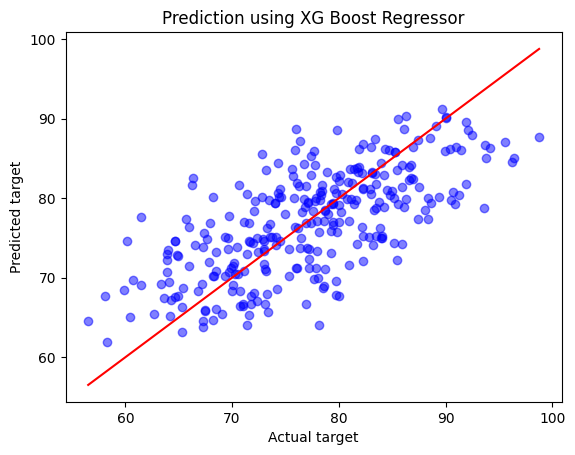

In [134]:
plt.scatter(y_test,xg_predict,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using XG Boost Regressor")

In [135]:
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

xgb = XGBRegressor(random_state=42, n_jobs=-1)

grid9 = GridSearchCV(estimator=xgb,
                    param_grid=params,
                    scoring='neg_root_mean_squared_error',
                    cv=3,
                    verbose=1)


In [136]:
grid9.fit(X_train_scaled,y_train)
xg_predict2 = grid9.predict(X_test_scaled)
calc_error(y_test,xg_predict2)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


28.726699829101562

Text(0.5, 1.0, 'Prediction using XG Boost Regressor after hyperparameter tuning')

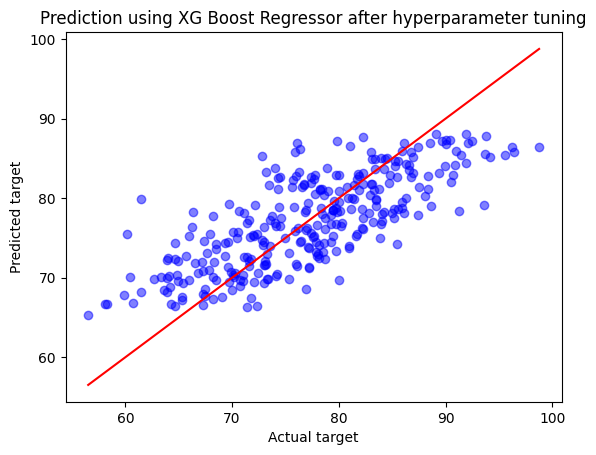

In [137]:
plt.scatter(y_test,xg_predict2,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'-r')
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Prediction using XG Boost Regressor after hyperparameter tuning")

In [138]:
with open('XgBoost.pkl', 'wb') as f:
    pickle.dump(grid9, f)